In [1]:
2+2

4

In [77]:
using Distributions
using Plots
using LinearAlgebra
using Posets
using DelimitedFiles

## Funciones

In [3]:
function randomsphere_point(n)
    vec = [rand() for _ in 1:n]
    vec/sqrt(dot(vec,vec))
end

randomsphere_point (generic function with 1 method)

In [4]:
function proyectar(vector,vectorrecta)
    (dot(vector,vectorrecta)/dot(vectorrecta,vectorrecta))*vectorrecta
end

proyectar (generic function with 1 method)

In [5]:
function proporcion(vector,vectorrecta)
    (proyectar(vector, vectorrecta)./vectorrecta)[1]
end

proporcion (generic function with 1 method)

In [6]:
function normalizacion(lista)
    x,y = extrema(lista)
    
    [1-(y - u)/(y-x) for u in lista]
end

normalizacion (generic function with 1 method)

## Poset

In [147]:
function minicomparativa(p,q)
    if all(p .<= q)
        return 1
    else
        return 0
    end
end

minicomparativa (generic function with 1 method)

In [83]:
function matrizposet(lista)
    dim, cantidadpuntos = size(lista)
    mat = zeros(Int64, cantidadpuntos,cantidadpuntos)
    for i in 1:cantidadpuntos, j in 1:cantidadpuntos
        if i == j
            continue
        end
        mat[i,j] = minicomparativa(lista[:,i], lista[:,j])
    end
    mat
end

matrizposet (generic function with 1 method)

## Calculando puntuaciones

In [127]:
numerorankings = 4
numeronodos = 10
dim = 5

5

In [128]:
hmmm = zeros(Int, numeronodos, numeronodos)
[hmmm[i,i] = 1 for i in 1:numeronodos];

In [ ]:
proporcion(puntos[:,i], j) #i es el iesimo vector y j la j-esima recta
# esto produce un vector con la i-sima entrada la proyeccion del nodo i/vector i
# 

In [138]:
[proporcion(puntos[:,i], listapuntos[1]) for i in 1:numeronodos] 

10-element Array{Float64,1}:
  1.590391443825073
  1.2313181246108744
  0.9443212752123067
  0.7964329063819493
  1.1106224337139794
  0.07165649069090278
 -1.2768298436300445
 -0.8849128134938266
  1.2948197568516933
 -1.55320351712715

In [140]:
[proporcion(puntos[:,i], listapuntos[3]) for i in 1:numeronodos] |> normalizacion

10-element Array{Float64,1}:
 0.997604560662013
 0.9337143009465418
 0.726831886788651
 0.3886140853319633
 1.0
 0.556398840596048
 0.032008408630270546
 0.0
 0.7922513227250862
 0.10631880644649672

In [151]:
all(puntos[:,1] .<= puntos[:,2])

false

In [153]:
minicomparativa(puntos[:,1],puntos[:,2])

p .<= q = Bool[1, 0, 1, 0, 0]


0

In [133]:
listapuntos = [randomsphere_point(dim) for _ in 1:numerorankings];

puntos = rand(MvNormal([0 for _ in 1:dim],1),numeronodos);

comparar = (matrizposet(puntos))

bloquenormalizado = [[proporcion(puntos[:,i], j) for i in 1:numeronodos] |> normalizacion for j in listapuntos];

puntuaciones = hcat(bloquenormalizado...)

10×4 Array{Float64,2}:
 1.0        1.0        0.997605   1.0
 0.885776   0.535712   0.933714   0.647052
 0.79448    0.466257   0.726832   0.509219
 0.747436   0.0        0.388614   0.565475
 0.847382   0.799041   1.0        0.531783
 0.51688    0.294108   0.556399   0.546396
 0.0879164  0.122064   0.0320084  0.0
 0.212588   0.0964327  0.0        0.310645
 0.905977   0.636528   0.792251   0.687878
 0.0        0.20907    0.106319   0.37335

In [134]:
comparar

10×10 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  1  0
 1  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0

In [104]:
poset_mn = puntuaciones |> fuzzy;

poset_m3 = puntuaciones |> m3;

poset_m2 = puntuaciones |> m2;

In [75]:
norm( reduccion_transitiva(αcut_poset(poset_mn - hmmm, .5))-comparar )

5.196152422706632

## graficas

In [105]:
writedlm("figs/poset0p5_gaussiano.dat", αcut_poset(poset_mn - hmmm, .5))
#;./script.wl figs/poset0p1_univ.dat

In [106]:
;./script.wl figs/poset0p5_gaussiano.dat

figs/poset0p5_gaussiano.png


![ejemplo](figs/poset0p5_gaussiano.png)

In [107]:
writedlm("figs/poset0p70_gaussiano.dat", αcut_poset(poset_mn - hmmm, .70))
#;./script.wl figs/poset0p1_univ.dat

In [108]:
;./script.wl figs/poset0p70_gaussiano.dat

figs/poset0p70_gaussiano.png


![asdf](figs/poset0p70_gaussiano.png)

In [109]:
writedlm("figs/poset0p85_gaussiano.dat", αcut_poset(poset_mn - hmmm, .85))
#;./script.wl figs/poset0p1_univ.dat

In [110]:
;./script.wl figs/poset0p85_gaussiano.dat

figs/poset0p85_gaussiano.png


![asdf](figs/poset0p85_gaussiano.png)

In [89]:
writedlm("figs/poset0p5_gaussiano_c.dat", comparar)
#;./script.wl figs/poset0p1_univ.dat

In [90]:
;./script.wl figs/poset0p5_gaussiano_c.dat

figs/poset0p5_gaussiano_c.png


![comparar](figs/poset0p5_gaussiano_c.png)

## Calculando puntuaciones

In [11]:
vr = randomsphere_point(2)

2-element Array{Float64,1}:
 0.5251330683086435
 0.8510201293557923

In [12]:
puntos = rand(MvNormal([0,0],1),3)

2×3 Array{Float64,2}:
 -1.06726   -0.0468612  -0.247625
  0.339297   0.749751   -0.335686

In [13]:
[proporcion(puntos[:,i], vr) for i in 1:3]

3-element Array{Float64,1}:
 -0.2717048848998565
  0.6134449087920684
 -0.41571107492377757

In [14]:
[proporcion(puntos[:,i], vr) for i in 1:3] |>normalizacion

3-element Array{Float64,1}:
 0.13992649540254898
 1.0
 0.0

## Juego

In [178]:
puntos[:,1]

2-element Array{Float64,1}:
 0.6001272373038556
 0.33912853079363725

In [186]:
proyectar(puntos[:,3], vr)./vr

2-element Array{Float64,1}:
 0.23777851034800768
 0.23777851034800768

In [193]:
[proporcion(puntos[:,i], vr) for i in 1:3]

3-element Array{Float64,1}:
 0.662081330580269
 0.6488426892189687
 0.23777851034800768

In [183]:
vr

2-element Array{Float64,1}:
 0.9731383980200564
 0.23022089023144338

In [157]:
rand(MvNormal([0,0],1),3)

2×3 Array{Float64,2}:
 0.0506018   0.0627046   1.39917
 0.524501   -1.99282    -0.0229824

In [161]:
randn()

0.3913590044467255

In [170]:
randomsphere_point(3)

3-element Array{Float64,1}:
 0.739497429352639
 0.5305029703088526
 0.4143792350906634

In [160]:
proyectar([2,2], [3,0])

2-element Array{Float64,1}:
 2.0
 0.0

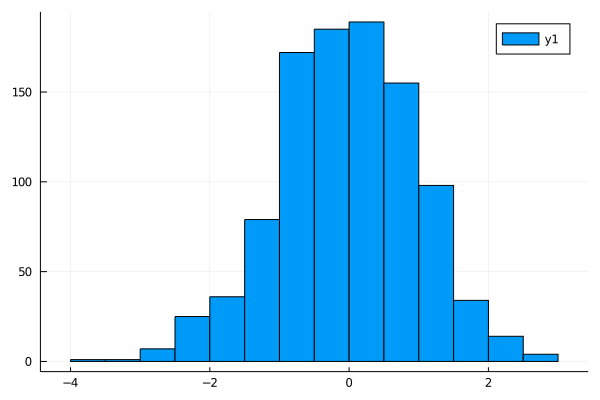

In [150]:
vcat(rand(MvNormal([0],1),10^3)...) |> histogram

## Mas formal